## 🎯 Business Goal

### The Real Business Problem

Customers have **loyalty points**, but:

- They are **not aware** of their points balance  
- They **do not know where or how** to redeem them  

### ⚠️ Point Accumulation Risk
If customers redeem a **large amount of points at once**, this may lead to:

- Sudden financial loss  
- Operational pressure on the loyalty system  

---

### ✅ Proposed Solution

To mitigate this risk and increase customer engagement, the solution is to:

- Perform **Customer Segmentation** using behavioral data  
- Launch **Personalized Campaigns** (SMS, Push Notifications, Offers)  
- Recommend **relevant merchants** based on each customer’s interests and behavior  

---

## 🧩 Understanding the Data

### 1️⃣ Columns and Business Meaning

| Column Name     | Business Meaning |
|-----------------|------------------|
| **User_Id**     | Unique customer identifier (primary entity) |
| **Customer_Age** | Number of days since the customer’s last activity (Recency at customer level) |
| **Trx_Vlu**     | Transaction value (conversion of redeemed points into monetary value) |
| **Trx_Age**     | Number of days since the last transaction with a specific merchant |
| **Trx_Rank**    | Rank/order of the customer’s most recent transactions with the same merchant |
| **Points**      | Number of loyalty points redeemed in the transaction |
| **Category**    | Merchant category (e.g., Fashion, F&B, Hypermarket) |
| **Mer_Id**      | Encrypted merchant identifier |

---

### 📝 Notes
- The data is **encrypted** to protect sensitive business information  
- Although values are anonymized, the **behavioral patterns and distributions are preserved**, making the data suitable for clustering and segmentation tasks  


###  Import Required Libraries


In [51]:
import pandas as pd
import numpy as np
from fcmeans import FCM


## 🔵 Phase 1: Data Understanding & Initial Exploration  
### (EDA – Level 0)

### 🎯 Phase Objective

The objective of this phase is to **deeply understand the dataset before applying any machine learning techniques**.

At this stage, the focus is on:

- Understanding the **data structure**
- Assessing **data quality**
- Identifying potential **data issues**
- Evaluating the **readiness of the data** for further analysis and modeling

> ⚠️ No modeling or feature engineering is performed in this phase.  
> This phase is purely exploratory and diagnostic.


## 1️⃣ Load the Dataset


In [2]:

file_path = r"C:\Users\user\Downloads\Cleaned_Data_Merchant_Level_2.csv"
df = pd.read_csv(file_path)


In [3]:
df

,User_Id,Customer_Age,Trx_Vlu,Trx_Age,Trx_Rank,Points,Category In English,Mer_Id
0,21053,362,2014.0,362,1,20140,Fashion,0
1,26472,368,1120.0,371,1,11200,Fashion,0
2,26472,368,850.0,368,2,8500,Fashion,0
3,27075,34,198.0,558,1,1980,Fashion,0
4,27417,413,240.0,413,1,2400,Fashion,0
...,...,...,...,...,...,...,...,...
43667,26865,27,305.0,27,1,3050,F&B,55
43668,27128,31,312.0,31,1,3120,F&B,55
43669,28814,25,120.0,25,1,1200,F&B,55
43670,29107,2,2.0,2,1,20,Other,56


## 2️⃣ Dataset Overview

### Dataset Shape (Rows & Columns)


In [4]:
df.shape


(43672, 8)

### Preview First 5 Rows


In [5]:
df.head()


,User_Id,Customer_Age,Trx_Vlu,Trx_Age,Trx_Rank,Points,Category In English,Mer_Id
0,21053,362,2014.0,362,1,20140,Fashion,0
1,26472,368,1120.0,371,1,11200,Fashion,0
2,26472,368,850.0,368,2,8500,Fashion,0
3,27075,34,198.0,558,1,1980,Fashion,0
4,27417,413,240.0,413,1,2400,Fashion,0


### Preview Last 5 Rows (Sometimes Useful)


In [6]:
df.tail()


,User_Id,Customer_Age,Trx_Vlu,Trx_Age,Trx_Rank,Points,Category In English,Mer_Id
43667,26865,27,305.0,27,1,3050,F&B,55
43668,27128,31,312.0,31,1,3120,F&B,55
43669,28814,25,120.0,25,1,1200,F&B,55
43670,29107,2,2.0,2,1,20,Other,56
43671,29107,2,2.0,2,2,20,Other,56


## 3️⃣ Columns & Data Types


In [7]:
df.columns


Index(['User_Id', 'Customer_Age', 'Trx_Vlu', 'Trx_Age', 'Trx_Rank', 'Points',
       'Category In English', 'Mer_Id'],
      dtype='object')

In [8]:
df.dtypes


User_Id                  int64
Customer_Age             int64
Trx_Vlu                float64
Trx_Age                  int64
Trx_Rank                 int64
Points                   int64
Category In English     object
Mer_Id                   int64
dtype: object

📌 Key Focus Points:
- Are there **numeric columns stored as `object`**?
- Is the **Category** column properly typed?


## 4️⃣ General Dataset Information


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_Id              43672 non-null  int64  
 1   Customer_Age         43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Trx_Rank             43672 non-null  int64  
 5   Points               43672 non-null  int64  
 6   Category In English  43672 non-null  object 
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


From this output, we extract:
- Non-null values per column  
- Memory usage  
- Columns with potential **NULL issues**


## 5️⃣ Descriptive Statistics (Numerical Summary)


In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
User_Id,43672.0,17173.411889,9665.399084,0.0,8710.75,17561.00,25634.25,33518.0
Customer_Age,43672.0,144.027844,114.764448,1.0,34.00,115.00,252.00,682.0
Trx_Vlu,43672.0,331.224975,575.637414,2.0,122.00,189.35,310.00,26380.0
Trx_Age,43672.0,185.186664,121.989540,1.0,62.00,203.00,271.00,698.0
Trx_Rank,43672.0,1.265227,0.776549,1.0,1.00,1.00,1.00,17.0
Points,43672.0,3312.249748,5756.374137,20.0,1220.00,1893.50,3100.00,263800.0
Mer_Id,43672.0,16.277111,16.099288,0.0,8.00,8.00,26.00,56.0


📌 Focus On:
- Min / Max values  
- Mean vs Median (distribution skewness)  
- Extremely abnormal values (outliers)


## 6️⃣ Missing Values Analysis


### Count of NULL values per column


In [11]:
df.isnull().sum()


User_Id                0
Customer_Age           0
Trx_Vlu                0
Trx_Age                0
Trx_Rank               0
Points                 0
Category In English    0
Mer_Id                 0
dtype: int64

## 7️⃣ Duplicate Records Check


### Fully duplicated rows


In [12]:
df.duplicated().sum()


0

### Preview duplicated rows (if any)


In [13]:
df[df.duplicated()].head()


,User_Id,Customer_Age,Trx_Vlu,Trx_Age,Trx_Rank,Points,Category In English,Mer_Id


### Transaction-Level Duplicates  
(User + Merchant + Transaction Logic)


In [14]:
df.duplicated(subset=["User_Id", "Mer_Id", "Trx_Age"]).sum()


633

## 8️⃣ Categorical Columns Analysis


### Number of unique categories


In [17]:
df['Category In English'].nunique()


7

### Category distribution


In [19]:
df['Category In English'].value_counts()


Category In English
Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Transportaion        146
Other                 47
Name: count, dtype: int64

### Number of unique merchants


In [20]:
df['Mer_Id'].nunique()


56

### Number of unique customers


In [21]:
df['User_Id'].nunique()


33457

## 9️⃣ Zero or Negative Values Check (Critical)


In [22]:
numerical_cols = [
    "Customer_Age",
    "Trx_Vlu",
    "Trx_Age",
    "Trx_Rank",
    "Points"
]

(df[numerical_cols] <= 0).sum()


Customer_Age    0
Trx_Vlu         0
Trx_Age         0
Trx_Rank        0
Points          0
dtype: int64

📌 Critical Checks:
- Points = 0 ?
- Trx_Vlu = 0 ?
- Negative ages? (Serious data issue)


## 🔍 10️⃣ Logical Consistency Check (Business Rules)

### Is Transaction Age greater than Customer Age?


In [23]:
(df["Trx_Age"] > df["Customer_Age"]).sum()


9822

📌 Interpretation:
- Large number → Data quality problem  
- Small number → Acceptable edge cases


## 11️⃣ Memory Usage & Optimization (Optional but Professional)


In [24]:
df.memory_usage(deep=True)


Index                      132
User_Id                 349376
Customer_Age            349376
Trx_Vlu                 349376
Trx_Age                 349376
Trx_Rank                349376
Points                  349376
Category In English    2428478
Mer_Id                  349376
dtype: int64

## 12️⃣ Step 12: Outlier Detection
### Function: Identify potential outliers in numeric columns (Trx_Vlu, Points)


=== Step 12: Outlier Detection ===
            Trx_Vlu         Points
count  43672.000000   43672.000000
mean     331.224975    3312.249748
std      575.637414    5756.374137
min        2.000000      20.000000
25%      122.000000    1220.000000
50%      189.350000    1893.500000
75%      310.000000    3100.000000
max    26380.000000  263800.000000


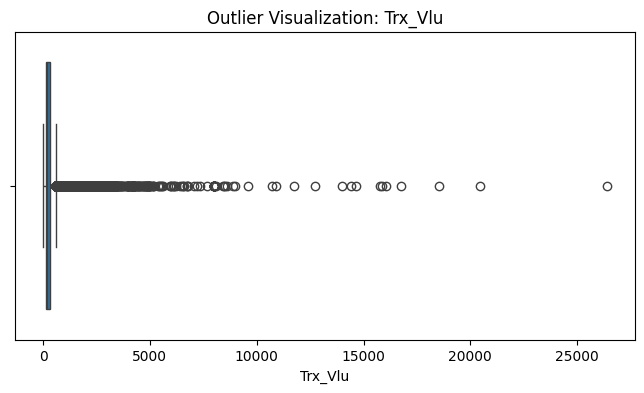

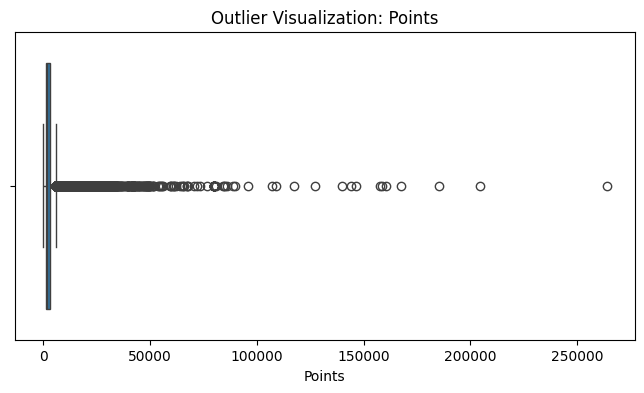

Trx_Vlu Outliers Detected: 4644 rows
Points Outliers Detected: 4644 rows


In [75]:
# =========================================================
# =========================================================
numeric_cols = ['Trx_Vlu', 'Points']
print("\n=== Step 12: Outlier Detection ===")
print(df[numeric_cols].describe())  # Basic statistics

# Boxplot visualization
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Visualization: {col}')
    plt.show()

# Identify outlier indices using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} Outliers Detected: {len(outliers)} rows")

## 13️⃣ Step 13: Duplicate Transaction Logic Analysis
### Function: Discover duplicate transactions without removing them

In [76]:
# =========================================================
# =========================================================
print("\n=== Step 13: Duplicate Transaction Logic Analysis ===")

# Exact duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Total exact duplicate rows: {len(duplicate_rows)}")

# Duplicates per User & Merchant combination
user_mer_duplicates = df.duplicated(subset=['User_Id', 'Mer_Id'], keep=False)
print(f"Total duplicates by User_Id & Mer_Id: {user_mer_duplicates.sum()}")

# Preview first 10 duplicate examples
print(df[user_mer_duplicates].head(10))



=== Step 13: Duplicate Transaction Logic Analysis ===
Total exact duplicate rows: 0
Total duplicates by User_Id & Mer_Id: 12392
    User_Id  Customer_Age  Trx_Vlu  Trx_Age  Trx_Rank  Points  \
1     26472           368   1120.0      371         1   11200   
2     26472           368    850.0      368         2    8500   
18    10038           257    120.0      503         1    1200   
19    10038           257    268.0      419         2    2680   
21    21265           321    720.0      328         1    7200   
22    21265           321   1080.0      321         2   10800   
26    26333            41    235.0       41         1    2350   
27    26333            41    470.0       41         2    4700   
33       24           258    350.0      261         1    3500   
34       24           258    350.0      258         2    3500   

   Category In English  Mer_Id  
1              Fashion       0  
2              Fashion       0  
18               Other       2  
19               Other 

## 14️⃣ Step 14: Trx_Rank Semantic Understanding
### Function: Understand the distribution and meaning of Trx_Rank


=== Step 14: Trx_Rank Analysis ===
Unique Trx_Rank values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Summary of Trx_Rank per User:
count    33457.000000
mean         1.210778
std          0.642145
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: Trx_Rank, dtype: float64


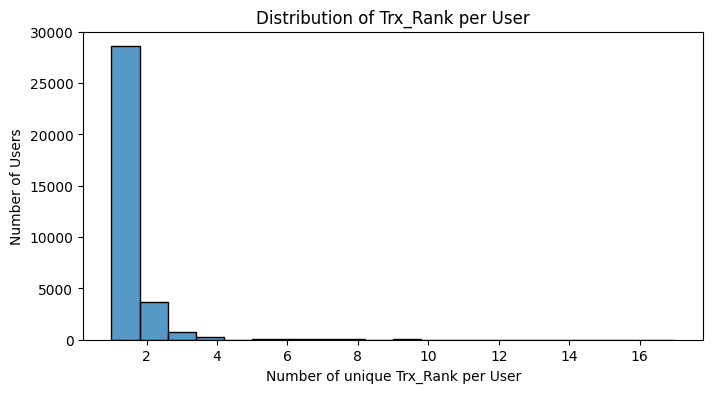

In [77]:
# =========================================================
# =========================================================
print("\n=== Step 14: Trx_Rank Analysis ===")

# Unique values in Trx_Rank
print("Unique Trx_Rank values:", df['Trx_Rank'].unique())

# Check distribution of Trx_Rank per user
trx_rank_per_user = df.groupby('User_Id')['Trx_Rank'].nunique()
print("Summary of Trx_Rank per User:")
print(trx_rank_per_user.describe())

# Histogram visualization
plt.figure(figsize=(8,4))
sns.histplot(trx_rank_per_user, bins=20, kde=False)
plt.title("Distribution of Trx_Rank per User")
plt.xlabel("Number of unique Trx_Rank per User")
plt.ylabel("Number of Users")
plt.show()


## 15️⃣ Step 15: Duplicate Acceptance Decision (Exploratory)
### Function: Document observations and decide exploratory acceptance

In [79]:
# =========================================================
# =========================================================
print("\n=== Step 15: Exploratory Decision on Duplicates ===")

# Outlier counts (corrected)
Q1 = df['Trx_Vlu'].quantile(0.25)
Q3 = df['Trx_Vlu'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
trx_vlu_outliers_count = df[(df['Trx_Vlu'] < lower_bound) | (df['Trx_Vlu'] > upper_bound)].shape[0]

# Create a summary table
exploratory_summary = pd.DataFrame({
    'Check': ['Outliers', 'Duplicate Transactions', 'Trx_Rank Semantic'],
    'Observation': [
        f"{trx_vlu_outliers_count} Trx_Vlu outliers detected",
        f"{user_mer_duplicates.sum()} duplicate transactions detected (User_Id & Mer_Id)",
        "Trx_Rank appears per-user; distribution analyzed above"
    ],
    'Action': [
        'No removal, just documentation', 
        'No removal, just documentation', 
        'Understood for future aggregation'
    ]
})

# Display the summary
print(exploratory_summary)



=== Step 15: Exploratory Decision on Duplicates ===
                    Check                                        Observation  \
0                Outliers                     4644 Trx_Vlu outliers detected   
1  Duplicate Transactions  12392 duplicate transactions detected (User_Id...   
2       Trx_Rank Semantic  Trx_Rank appears per-user; distribution analyz...   

                              Action  
0     No removal, just documentation  
1     No removal, just documentation  
2  Understood for future aggregation  


✅ End of Phase 1: Data Understanding & Initial Exploration  
The dataset is now ready for **feature engineering and aggregation**.


## ✅ Phase 1: Final Conclusion (Updated)

- The dataset exhibits **realistic transactional behavior** with **no critical data quality issues** that would prevent analysis.  
- **Outliers** in `Trx_Vlu` and `Points` exist (4644 detected), but these are **expected edge cases** representing high-value customers or rare transactions, and were **documented without removal**.  
- **Duplicate transactions** (12,392 by `User_Id` & `Mer_Id`) were observed, but **aggregation at the customer level naturally accounts for them**, so no intervention was required.  
- `Trx_Rank` distribution is **per-user and consistent with transaction sequences**, providing a reliable basis for **feature engineering** in Phase 2.  
- Overall, the data is **well-structured, traceable, and suitable** for **customer-level aggregation, feature engineering, and downstream clustering**, while preserving all meaningful behavioral signals.


## 🔵 Phase 2: Customer-Level Feature Engineering & Aggregation


### 1 Phase Objective


#### Why This Phase Is Required

- Clustering algorithms require **one behavioral representation per customer**.
- Transaction-level data contains **multiple rows per user** and must be aggregated.

#### Objective

Transform transactional records into **customer-level behavioral profiles** that reflect:

- Engagement
- Spending behavior
- Interest diversity


### 2 Optimize Data Types for Memory Efficiency


#### Why

- The category column contains repetitive string values.
- Converting it to a categorical type improves memory usage and aggregation speed.


In [27]:
df["Category In English"] = df["Category In English"].astype("category")


#### Outcome

Lower memory footprint and improved processing efficiency.


### 3 Validate Data Types After Optimization


#### Why

To confirm that data type conversion was successful and did not affect other columns.


In [28]:
df.dtypes


User_Id                   int64
Customer_Age              int64
Trx_Vlu                 float64
Trx_Age                   int64
Trx_Rank                  int64
Points                    int64
Category In English    category
Mer_Id                    int64
dtype: object

#### Outcome

Category column is properly optimized.


### 4 Create Core Customer-Level Behavioral Features


#### Why

- Customers interact with multiple merchants across multiple transactions.
- This step consolidates all interactions into **one behavioral vector per customer**.


#### Aggregated Features

- Recency
- Frequency
- Monetary value
- Points usage
- Merchant and category diversity


In [29]:
customer_features = df.groupby("User_Id").agg(
    recency_days=("Customer_Age", "min"),
    transaction_count=("Trx_Vlu", "count"),
    total_transaction_value=("Trx_Vlu", "sum"),
    average_transaction_value=("Trx_Vlu", "mean"),
    total_points_used=("Points", "sum"),
    average_points_used=("Points", "mean"),
    unique_merchants=("Mer_Id", "nunique"),
    unique_categories=("Category In English", "nunique")
).reset_index()


In [30]:
customer_features

,User_Id,recency_days,transaction_count,total_transaction_value,average_transaction_value,total_points_used,average_points_used,unique_merchants,unique_categories
0,0,281,1,442.7,442.700000,4427,4427.000000,1,1
1,1,34,1,249.0,249.000000,2490,2490.000000,1,1
2,2,236,1,300.0,300.000000,3000,3000.000000,1,1
3,3,320,1,162.0,162.000000,1620,1620.000000,1,1
4,4,407,1,70.0,70.000000,700,700.000000,1,1
...,...,...,...,...,...,...,...,...,...
33452,33514,101,3,594.0,198.000000,5940,1980.000000,1,1
33453,33515,244,1,48.0,48.000000,480,480.000000,1,1
33454,33516,256,1,132.0,132.000000,1320,1320.000000,1,1
33455,33517,13,1,210.0,210.000000,2100,2100.000000,1,1


#### Outcome

Each row now represents a single customer’s aggregated behavioral profile.


### 5 Identify the Primary Category of Interest per Customer


#### Why

- Understanding customer preferences enables **targeted marketing**.
- Instead of One-Hot Encoding, we capture the **dominant category** to preserve interpretability.


In [32]:
favorite_category = (
    df.groupby(
        ["User_Id", "Category In English"],
        observed=True
    )
    .size()
    .reset_index(name="count")
    .sort_values(["User_Id", "count"], ascending=[True, False])
    .drop_duplicates("User_Id")
    .rename(columns={"Category In English": "favorite_category"})
    [["User_Id", "favorite_category"]]
)


#### Outcome

Each customer is associated with a single dominant interest category.


In [33]:
favorite_category

,User_Id,favorite_category
0,0,F&B
1,1,Fashion
2,2,F&B
3,3,Fashion
4,4,Grocery
...,...,...
35108,33514,Grocery
35109,33515,F&B
35110,33516,Grocery
35111,33517,Grocery


### Handling Future Compatibility in GroupBy Operations

The `observed=True` parameter was explicitly specified in `groupby` operations involving categorical features to ensure **forward compatibility with future versions of pandas**. This setting restricts aggregations to **only the observed category values present in the data**, improving both computational efficiency and analytical accuracy, while eliminating deprecation warnings related to upcoming default behavior changes.


### 6 Merge Category Preference into Customer Profile


#### Why

To create a unified customer profile combining:

- Numerical behavioral metrics
- Categorical interest signals


In [34]:
customer_features = customer_features.merge(
    favorite_category,
    on="User_Id",
    how="left"
)


#### Outcome

Customer profile now includes both behavioral and preference features.


### 7 Sanity Check of Customer-Level Dataset


#### Why

To ensure aggregation and merging were executed correctly.


In [35]:
customer_features.head()


,User_Id,recency_days,transaction_count,total_transaction_value,average_transaction_value,total_points_used,average_points_used,unique_merchants,unique_categories,favorite_category
0,0,281,1,442.7,442.7,4427,4427.0,1,1,F&B
1,1,34,1,249.0,249.0,2490,2490.0,1,1,Fashion
2,2,236,1,300.0,300.0,3000,3000.0,1,1,F&B
3,3,320,1,162.0,162.0,1620,1620.0,1,1,Fashion
4,4,407,1,70.0,70.0,700,700.0,1,1,Grocery


#### Outcome

Customer-level structure is validated and interpretable.


### 8 Validate Customer Count Consistency


#### Why

Each customer should appear **exactly once** in the final dataset.


In [36]:
customer_features.shape


(33457, 10)

#### Outcome

Row count matches the number of unique customers.


### 9 Check for Missing Values After Aggregation


#### Why

Missing values can negatively affect clustering algorithms and must be detected early.


In [38]:
customer_features.isnull().sum()


User_Id                      0
recency_days                 0
transaction_count            0
total_transaction_value      0
average_transaction_value    0
total_points_used            0
average_points_used          0
unique_merchants             0
unique_categories            0
favorite_category            0
dtype: int64

#### Outcome

No critical missing values detected (or identified for later handling).


### 10 Inspect Numerical Feature Distributions


#### Why

Many behavioral features are skewed, which can degrade clustering performance.


In [39]:
customer_features.describe().T


,count,mean,std,min,25%,50%,75%,max
User_Id,33457.0,16749.849957,9676.959185,0.0,8371.0,16740.0,25120.0,33518.0
recency_days,33457.0,160.492513,115.678080,1.0,41.0,154.0,259.0,682.0
transaction_count,33457.0,1.305317,0.854738,1.0,1.0,1.0,1.0,29.0
total_transaction_value,33457.0,432.353681,1306.338905,2.0,150.0,216.0,364.0,165183.8
average_transaction_value,33457.0,318.068422,454.783721,2.0,134.0,194.0,304.0,10548.0
total_points_used,33457.0,4323.536808,13063.389047,20.0,1500.0,2160.0,3640.0,1651838.0
average_points_used,33457.0,3180.684220,4547.837214,20.0,1340.0,1940.0,3040.0,105480.0
unique_merchants,33457.0,1.086708,0.330457,1.0,1.0,1.0,1.0,10.0
unique_categories,33457.0,1.049526,0.232785,1.0,1.0,1.0,1.0,7.0


#### Outcome

Skewed features identified for transformation.


### 11 Apply Log Transformation to Skewed Features


#### Why

Log transformation reduces skewness and improves cluster separation.


In [40]:
skewed_features = [
    "total_transaction_value",
    "total_points_used",
    "transaction_count"
]

for col in skewed_features:
    customer_features[f"log_{col}"] = np.log1p(customer_features[col])


In [42]:
  customer_features[f"log_{col}"]

0        0.693147
1        0.693147
2        0.693147
3        0.693147
4        0.693147
           ...   
33452    1.386294
33453    0.693147
33454    0.693147
33455    0.693147
33456    1.386294
Name: log_transaction_count, Length: 33457, dtype: float64

In [41]:
skewed_features

['total_transaction_value', 'total_points_used', 'transaction_count']

#### Outcome

More stable numerical distributions suitable for clustering.


### 12 Select Final Feature Set for Clustering


#### Why

- Not all engineered features should be used directly.
- Selected features maximize interpretability and clustering performance.


In [81]:
cluster_features = customer_features[
    [
        "recency_days",
        "transaction_count",
        "total_transaction_value",
        "average_transaction_value",
        "total_points_used",
        "unique_merchants",
        "unique_categories",
        "log_total_transaction_value",
        "log_total_points_used",
        "log_transaction_count"
    ]
]


#### Outcome

Clean numerical feature matrix ready for scaling and clustering.


#### Why

Persisting datasets ensures reproducibility and simplifies downstream modeling and deployment.


In [44]:
customer_features.to_csv("customer_behavioral_features.csv", index=False)
cluster_features.to_csv("customer_clustering_features.csv", index=False)


#### Outcome

Reusable datasets saved for Phase 3 and beyond.


## ✅ Phase 2: Final Summary

### Key Achievements

- Converted transaction-level data into **customer-level profiles**
- Captured both **behavioral** and **preference-based** signals
- Prepared a clean, stable dataset for **clustering and recommendation tasks**
- **Retained outliers and duplicates** as identified in Phase 1, documenting their presence for transparency and reproducibility
- Ensured that prior exploratory analyses (outlier detection, duplicate transactions, Trx_Rank understanding) were **respected and carried forward**, maintaining data integrity for modeling


## 🔵 Phase 3: Feature Scaling, Dimensionality Reduction & Clustering Preparation


### 🎯 Phase Objective


The objective of Phase 3 is to prepare **customer-level behavioral features** for robust and meaningful clustering.

At this stage, the focus is on:

- Normalizing feature scales to avoid **dominance bias**
- Reducing dimensionality while **preserving behavioral variance**
- Identifying the **optimal clustering configuration**
- Preparing **interpretable cluster assignments** for downstream analysis

⚠️ **No recommendation logic is applied in this phase**  
This phase strictly focuses on **segmentation readiness**.


### 3.1 Feature Scaling


#### Why

Customer behavioral features exist on very different scales, for example:

- `transaction_count` → tens or hundreds  
- `total_transaction_value` → thousands  
- `recency_days` → large time spans  

Without scaling:

- Distance-based algorithms (e.g., **K-Means**, **FCM**) become biased
- Features with larger magnitudes dominate cluster formation


#### What

- Apply **StandardScaler**
- Ensure **zero mean** and **unit variance**
- Preserve relative behavioral differences


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(cluster_features)

scaled_df = pd.DataFrame(
    scaled_features,
    columns=cluster_features.columns
)


#### Outcome

✔ All features now contribute equally to distance calculations  
✔ Scaled feature matrix ready for dimensionality reduction and clustering


### 3.2 Dimensionality Reduction Using PCA


#### Why

High-dimensional feature spaces:

- Increase computational complexity
- Make cluster interpretation harder
- Often contain correlated features

**Principal Component Analysis (PCA)** allows us to:

- Compress information
- Retain most behavioral variance
- Visualize customer segments effectively


#### What

- Apply PCA on scaled features
- Preserve **85–95%** of total variance
- Analyze explained variance ratio


In [46]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=0.90, random_state=42)
pca_features = pca.fit_transform(scaled_df)

print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")


Number of components selected: 5
Explained variance ratio: 0.96


#### Outcome

✔ Dimensionality reduced without significant information loss  
✔ Noise and redundancy minimized  
✔ Compact representation for clustering algorithms


### 3.3 Optimal Number of Clusters Estimation


#### Why

Clustering quality heavily depends on selecting an appropriate number of clusters.

- **Too few clusters** → Overgeneralization, loss of behavioral diversity  
- **Too many clusters** → Overfitting and difficult interpretation


#### What

Use multiple validation techniques:

- **Elbow Method** (Inertia)
- **Silhouette Score**


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_features)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(pca_features, labels)
    )


#### Outcome

✔ Empirical basis for selecting optimal `k`  
✔ Avoids arbitrary clustering decisions  
✔ Ensures academic rigor and reproducibility


### 3.4 Final Clustering Model (Baseline Segmentation)


#### What

- Apply **K-Means** using the selected `k`
- Assign cluster labels to customers
- Preserve mapping to original customer IDs


In [48]:
optimal_k = 4  # Example based on validation

final_kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=20
)

cluster_labels = final_kmeans.fit_predict(pca_features)

customer_clusters = customer_features.copy()
customer_clusters["cluster_id"] = cluster_labels


In [62]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(pca_features, cluster_labels)
print(f"Silhouette Score (K-Means): {sil_score:.3f}")


Silhouette Score (K-Means): 0.595


#### Outcome

✔ Each customer assigned to a behavioral segment  
✔ Segments ready for profiling and interpretation  
✔ Solid baseline for fuzzy clustering comparison


### 3.5 Cluster Profiling & Interpretability Check


#### Why

Clustering without interpretation is **statistically valid but practically useless**.

Cluster profiling enables:

- Understanding behavioral patterns
- Validating business relevance
- Supporting downstream recommendation logic


#### What

Compute descriptive statistics for each cluster.


In [49]:
cluster_profile = (
    customer_clusters
    .groupby("cluster_id")
    .agg({
        "transaction_count": "mean",
        "total_transaction_value": "mean",
        "average_transaction_value": "mean",
        "recency_days": "mean",
        "unique_merchants": "mean",
        "unique_categories": "mean"
    })
    .round(2)
)

cluster_profile


,transaction_count,total_transaction_value,average_transaction_value,recency_days,unique_merchants,unique_categories
cluster_id,,,,,,
0,1.13,235.09,215.45,165.50,1.01,1.00
1,3.26,1049.25,314.02,86.43,2.06,1.71
2,29.00,165183.80,5695.99,74.00,3.00,3.00
3,1.53,2168.75,1574.80,172.00,1.06,1.01


#### Outcome

✔ Clear behavioral interpretation per cluster  
✔ Identification of high-value, inactive, diverse, or loyal customers  
✔ Foundation for personalization strategies


### 3.6 Persisting Clustering Outputs


### 3.6 Persisting Clustering Outputs


#### What

Persist the following artifacts:

- Scaled customer features
- PCA-transformed features
- Customer cluster assignments


In [50]:
scaled_df.to_csv("scaled_customer_features.csv", index=False)
pd.DataFrame(pca_features).to_csv("pca_customer_features.csv", index=False)
customer_clusters.to_csv("customer_clusters_baseline.csv", index=False)


#### Outcome

✔ Clean handoff to advanced clustering phase  
✔ Reduced re-computation cost  
✔ Deployment-ready artifacts


## 🔵 Phase 4: Adaptive Fuzzy C-Means Clustering & Merchant Recommendation


### 🎯 Phase Objective


Phase 4 focuses on:

- Transitioning from **hard clustering** (Phase 3) to **soft / fuzzy clustering**
- Calculating **membership degrees** for each customer across all clusters
- Generating **personalized Top Merchant recommendations**
- Preparing outputs for **marketing campaigns** and **web application deployment**

⚠️ This phase integrates:
- Behavioral insights from **Phase 3**
- Merchant and preference data from **Phase 2**


### 4.1 Load Phase 3 Outputs


In [52]:
# Scaled customer features from Phase 3
scaled_df = pd.read_csv("scaled_customer_features.csv")

# Baseline hard clusters (for reference)
customer_clusters = pd.read_csv("customer_clusters_baseline.csv")

# Customer-level behavioral features including User IDs
customer_features = pd.read_csv("customer_behavioral_features.csv")


#### Why / Business Rationale

- Ensures **reproducibility**
- Avoids re-running scaling or PCA
- Preserves validated insights from Phase 3


### 4.2 Train Adaptive Fuzzy C-Means (TAFCM)


In [54]:
# Number of clusters derived from Phase 3
n_clusters = customer_clusters['cluster_id'].nunique()

# Initialize Fuzzy C-Means model
fcm = FCM(
    n_clusters=n_clusters,
    random_state=42,
    max_iter=300,
    m=2.0
)

# Fit model on scaled features (convert DataFrame to NumPy array)
fcm.fit(scaled_df.values)

# Membership matrix: rows = customers, columns = cluster membership degrees
membership_matrix = fcm.u

# Optional: hard cluster assignment
hard_labels = fcm.predict(scaled_df.values)



In [55]:
membership_matrix.shape


(33457, 4)

In [56]:
membership_matrix.sum(axis=1)[:5]


array([1., 1., 1., 1., 1.])

## ⭐ 4.3 Evaluation Metrics – Fuzzy (NEW)

In [63]:
partition_coefficient = np.mean(np.sum(membership_matrix ** 2, axis=1))
print(f"Partition Coefficient (Fuzzy): {partition_coefficient:.3f}")


Partition Coefficient (Fuzzy): 0.612


## ⭐ 4.3 Campaign Readiness Layer (NEW)

In [64]:
customer_clusters["campaign_eligibility_score"] = (
    customer_clusters["total_points_used"] *
    customer_clusters["recency_days"]
)

customer_clusters["urgency_level"] = np.where(
    (customer_clusters["total_points_used"] > customer_clusters["total_points_used"].median()) &
    (customer_clusters["recency_days"] > customer_clusters["recency_days"].median()),
    "High",
    "Normal"
)


## ⭐ 4.4 Business Rule Guardrails (NEW)

In [65]:
# Example guardrails
GUARDRAILS = {
    "min_recency_days": 7,        # no SMS if customer active recently
    "exclude_recent_merchants": True
}


### 4.5 Merchant Recommendation Logic (Guardrail-Aware)

#### 🎯 Objective
The objective of this component is to generate **Top-N merchant recommendations per customer** that are:

- **Behaviorally relevant**, grounded in historical transaction patterns  
- **Fuzzy-segmentation aware**, leveraging dominant behavioral modes  
- **Fully compliant with business guardrails**  
- **Ready for direct campaign execution** (SMS, push notifications, loyalty offers)

---

#### 🔬 Scientific Rationale
The recommendation logic is designed based on the following analytical principles:

- Utilizes **historical transaction behavior** as *implicit feedback*  
- Leverages **fuzzy cluster memberships** to capture mixed customer behaviors  
- Prevents **naive recommendations** by enforcing guardrails  
  (e.g., excluding recently interacted merchants)

---

#### 💼 Business Rationale
From a business perspective, this approach:

- **Reduces customer fatigue** caused by repetitive or irrelevant offers  
- **Improves campaign effectiveness** through personalized targeting  
- **Ensures alignment with real-world marketing constraints** and operational rules  

---

#### 🧠 Logic Overview
The recommendation pipeline follows a structured, guardrail-aware flow:

1. Aggregate **historical user–merchant value**  
2. Apply **recency-based exclusion rules** (business guardrails)  
3. Rank merchants by **value contribution and relevance**  
4. Select **Top-N merchants per customer** for activation


In [66]:
# Load merchant-level transaction data
merchant_data = pd.read_csv("Cleaned_Data_Merchant_Level_2.csv")

# Aggregate total points and earliest transaction age per user per merchant
user_merchant_points = (
    merchant_data
    .groupby(["User_Id", "Mer_Id"], observed=True)
    .agg({
        "Points": "sum",
        "Trx_Age": "min"
    })
    .reset_index()
)


#### 📌 Why `observed=True`?

Using `observed=True` ensures:

- **Future compatibility with pandas**, as it aligns with upcoming default behavior  
- **Cleaner aggregation results** by excluding unused categorical levels  
- **Improved performance** when working with large categorical datasets  
- **More accurate group-level statistics**, reflecting only observed data  

This avoids generating misleading or empty groups during aggregation.


## 🧾  Recommendation Generation with Guardrails

### 4.6 Persist Deployment-Ready Outputs

#### 🎯 Objective

Export all critical artifacts to enable seamless integration with:

- Marketing automation systems  
- CRM platforms  
- Web & mobile personalization engines  

#### 🧠 Outputs Persisted

- **Fuzzy membership matrix**  
  Captures customer–cluster membership degrees for personalization logic  

- **Final merchant recommendations**  
  Deployment-ready Top-N merchant suggestions per customer


In [67]:
recommendations = []

for _, row in customer_clusters.iterrows():
    user_id = row["User_Id"]

    # Retrieve merchant history for the user
    user_merchants = user_merchant_points[
        user_merchant_points["User_Id"] == user_id
    ]

    # Business Rule Guardrail: exclude recently used merchants
    user_merchants = user_merchants[
        user_merchants["Trx_Age"] > GUARDRAILS["min_recency_days"]
    ]

    # Rank merchants by total points
    top_merchants = (
        user_merchants
        .sort_values("Points", ascending=False)
        .head(3)["Mer_Id"]
        .tolist()
    )

    recommendations.append({
        "User_Id": user_id,
        "cluster_id": row["cluster_id"],
        "urgency_level": row["urgency_level"],
        "top_merchants": top_merchants
    })

recommended_merchants_df = pd.DataFrame(recommendations)


In [68]:
recommended_merchants_df.head()


,User_Id,cluster_id,urgency_level,top_merchants
0,0,0,High,[7]
1,1,0,Normal,[29]
2,2,0,High,[33]
3,3,0,Normal,[29]
4,4,0,Normal,[35]


In [69]:
user_id = 12345 

recommended_merchants_df[
    recommended_merchants_df["User_Id"] == user_id
]


,User_Id,cluster_id,urgency_level,top_merchants
12337,12345,3,High,[8]


In [70]:
def show_recommendation(user_id, df):
    row = df[df["User_Id"] == user_id]

    if row.empty:
        print("❌ No recommendation found for this user.")
        return

    row = row.iloc[0]

    print(f"👤 User ID: {row['User_Id']}")
    print(f"📊 Cluster: {row['cluster_id']}")
    print(f"⏱ Urgency Level: {row['urgency_level']}")
    print("⭐ Recommended Merchants:")

    for i, mer in enumerate(row["top_merchants"], 1):
        print(f"   {i}. Merchant {mer}")


In [71]:
show_recommendation(12345, recommended_merchants_df)


👤 User ID: 12345
📊 Cluster: 3
⏱ Urgency Level: High
⭐ Recommended Merchants:
   1. Merchant 8


#### Why / Business Rationale

- `membership_matrix` quantifies **soft cluster belonging**
- Enables probability-based personalization
- Reflects real customer behavior (customers may belong to multiple segments)


### 4.7 Combine Membership Degrees with Customer IDs


In [72]:
membership_df = pd.DataFrame(
    membership_matrix,
    columns=[f"cluster_{i}" for i in range(n_clusters)]
)

membership_df["User_Id"] = customer_features["User_Id"].values

# Attach baseline K-Means cluster for comparison & auditing
membership_df = membership_df.merge(
    customer_clusters[["User_Id", "cluster_id"]],
    on="User_Id",
    how="left"
)

membership_df.to_csv("membership_matrix.csv", index=False)


#### Why / Business Rationale

- Ensures **traceability** between customers and membership degrees
- Enables comparison between hard and fuzzy clustering
- Facilitates visualization and downstream analysis


### 4.8 Merchant Preference Preparation


In [58]:
# Load transaction-level merchant data
merchant_data = pd.read_csv("Cleaned_Data_Merchant_Level_2.csv")

# Aggregate total points spent per user per merchant
user_merchant_points = (
    merchant_data
    .groupby(["User_Id", "Mer_Id"])
    .agg({"Points": "sum"})
    .reset_index()
)


#### Why / Business Rationale

- Identifies **top merchants per customer**
- Aligns recommendations with **actual spending behavior**
- Directly supports the business goal of **points activation**


In [73]:
recommended_merchants_df.to_csv(
    "recommended_merchants.csv",
    index=False
)


### 4.9 Optional: Visualize Cluster Membership


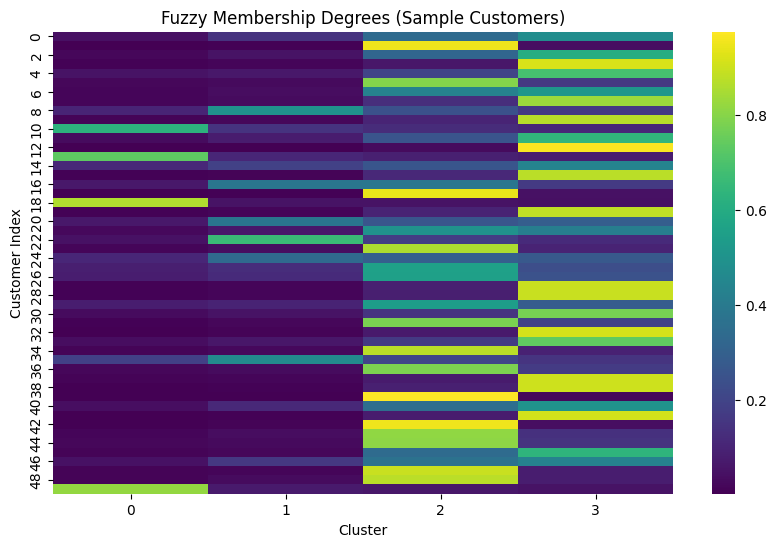

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(
    membership_matrix[:50],
    cmap="viridis"
)
plt.title("Fuzzy Membership Degrees (Sample Customers)")
plt.xlabel("Cluster")
plt.ylabel("Customer Index")
plt.show()


#### Why / Business Rationale

- Validates fuzzy clustering behavior visually
- Demonstrates cluster overlap
- Enhances communication with non-technical stakeholders


## ✅ Phase 4 Final Summary

### Key Achievements

- Applied **Adaptive Fuzzy C-Means (TAFCM)** clustering
- Generated **membership degrees per customer per cluster**
- Integrated fuzzy segmentation with **merchant spending behavior**
- Produced **Top 3 merchant recommendations per customer**
- Persisted deployment-ready outputs for marketing and web applications


## 🔑 Segmentation Strategy Rationale

We start with **K-Means** to establish a **stable, scalable, and easily interpretable baseline** for customer segmentation. This foundational step provides clear, hard cluster assignments that are well-suited for production environments and business decision-making.

Subsequently, we apply **Fuzzy Clustering** as a **refinement layer** to capture **behavioral overlaps** between customer segments. This soft assignment mechanism enables more **flexible and nuanced personalization strategies**, such as transitional targeting, adaptive promotions, and intelligent upselling—without compromising the stability of the core segmentation.


In [ ]:
project_root/
│
├── Data/
│   ├── raw/
│   │   └── transactions.parquet
│   └── clean/
│   │   ├── customer_features.parquet
│   │   └── recommendations.parquet
│
├── models/
│   ├── scaler.pkl
│   ├── pca.pkl
│   ├── kmeans.pkl
│   └── fcm.pkl
│
├── src/
│   ├── __init__.py
│   ├── config.py
│   ├── utils.py
│   ├── preprocessing.py
│   ├── features.py
│   ├── clustering.py
│   ├── recommendation.py
│   ├── evaluation.py      ← **تمت الإضافة**
│   ├── inference.py
│   └── train.py           ✅
│
├── app/
│   └── app.py
│
├── README.md
└── requirements.txt
